# E-commerce data analysis
### Retailrocket recommender system dataset

Author: Karsenbay Aibat

----
***Data***:  
The behaviour data from 2015-05-03 to 2015-09-18 to, i.e. events like clicks, add to carts, transactions, represent interactions that were collected over a period of 4.5 months  

***Four csv files***:  
```
events.csv                  |  2756102 rows                          |  89.8 MB  
item_properties_part1.csv   |  11000000 rows                         |  461 MB  
item_properties_part2.csv   |  9275904 rows                          |  389 MB   
category_tree.csv           |  1670 rows                             |  14.1 KB  
```

The data has been collected from a real-world ecommerce website. It is raw data, i.e. without any content transformations, however, all values are hashed due to confidential issues  

Dataset link: https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset?select=events.csv  

## Events Sample

| timestamp      | visitorid | event | itemid | transactionid |
|----------------|-----------|-------|--------|---------------|
| 1433221332117  | 257597    | view  | 355908 |               |
| 1433224214164  | 992329    | view  | 248676 |               |
| 1433221999827  | 111016    | view  | 318965 |               |
| 1433221955914  | 483717    | view  | 253185 |               |
| 1433221337106  | 951259    | view  | 367447 |               |
| 1433224086234  | 972639    | view  | 22556  |               |
| 1433221923240  | 810725    | view  | 443030 |               |
| 1433223291897  | 794181    | view  | 439202 |               |
| 1433220899221  | 824915    | view  | 428805 |               |


## Item Properties Sample

| timestamp      | itemid | property   | value                          |
|----------------|--------|------------|--------------------------------|
| 1435460400000  | 460429 | categoryid | 1338                           |
| 1441508400000  | 206783 | 888        | 1116713 960601 n277.200        |
| 1439089200000  | 395014 | 400        | n552.000 639502 n720.000 424566|
| 1431226800000  | 59481  | 790        | n15360.000                     |
| 1431831600000  | 156781 | 917        | 828513                         |
| 1436065200000  | 285026 | available  | 0                              |
| 1434250800000  | 89534  | 213        | 1121373                        |
| 1431831600000  | 264312 | 6          | 319724                  m       |
| 1433646000000  | 229370 | 202        | 1330310                        |


## Category Tree Sample

| categoryid | parentid |
|------------|----------|
| 1016       | 213      |
| 809        | 169      |
| 570        | 9        |
| 1691       | 885      |
| 536        | 1691     |
| 231        |          |
| 542        | 378      |
| 1146       | 542      |
| 1140       | 542      |



# Analysis Provided

----
#### Sales Conversion Rate 
Sales Conversion Rate = (Number of Conversions / Total Number of Leads or Visitors) x 100 

#### Repeat/returning customer rate 
Customers who made two or more purchases / Total customers x 100

#### Website Traffic  
Number of visits to a website, as well as visitor quality

#### Add-to-Cart Rate  
Website sessions where visitor adds products to cart in a specific period / Total sessions during that period x 100

#### Cart Abandonment Rate  
1 – (Completed purchases / Carts created) × 100

#### Average Order Value 
Total revenue / Number of orders

#### Monthly recurring revenue (MRR)
Total revenue from paying customers in a given month

###### New MRR = Total number of new customers in a month x Revenue brought in by new customers in month
###### Expansion MRR = Total number of customers who upgraded in a month x (New revenue - Old revenue)
###### Churn MRR = Total number of customers who canceled or downgraded x Lost revenue
###### Net MRR Growth = Expansion MRR + Churn MRR
###### ARPA = MRR / Total number of customers in that month



#### Customer Retention Rate
(Customers at end of period – New customers) / Customers at beginning of period × 100

----

Now let's create tables and import the data in SQL

In [ ]:
CREATE TABLE item_properties(
	timestamp BIGINT,
	item_id INT,
	property TEXT,
	value TEXT
);

CREATE TABLE events(
	timestamp BIGINT,
	visitor_id INT,
	event TEXT,
	item_id INT,
	transaction_id INT
);

CREATE TABLE category_tree(
	category_id INT,
	parent_id INT
)

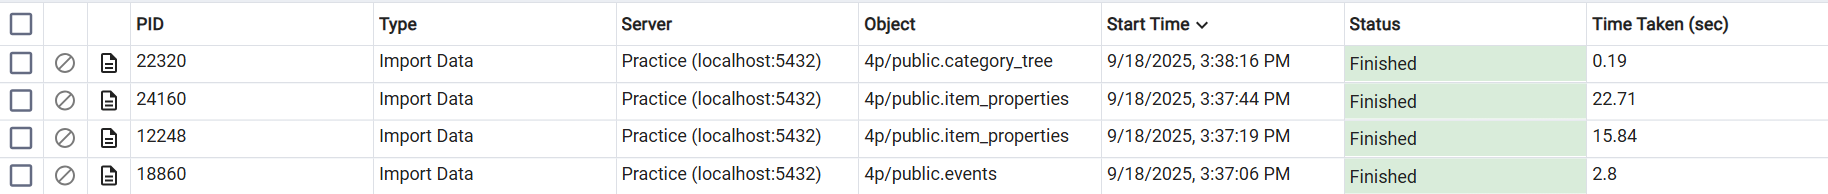  

### First metric:  
#### Sales Conversion Rate  
_Total transactions / Total visits x 100_

In [ ]:
SELECT 
  ROUND(
    COUNT(DISTINCT visitor_id) FILTER (WHERE transaction_id IS NOT NULL)::NUMERIC
    / COUNT(DISTINCT visitor_id) * 100,
    4
  ) AS Sales_Conversion_Rate
FROM events;


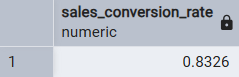

_Query complete 00:00:01.093_

By months:

In [ ]:
SELECT 
  EXTRACT(MONTH FROM to_timestamp(timestamp / 1000)::date) AS month,
  ROUND(
    COUNT(DISTINCT visitor_id) FILTER (WHERE transaction_id IS NOT NULL)::NUMERIC
    / COUNT(DISTINCT visitor_id) * 100,
    4
  ) AS Sales_Conversion_Rate
FROM events
GROUP BY 1
ORDER BY 1;

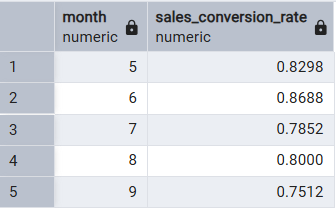

_Query complete 00:00:01.103_

With the knowledge that sales conversation rate is only 0.8326%, i can assume that most of the consumers dont reach the final stage of purchasing. Instead something stops them. The reasons may be diverce. Percent being that low is not surprising in e commerce field, but it can be much higher. Next metrics will help me to understand the problem better. Repeat customer rate will tell me is there problem specifically in product that people are not satisfied with

I will compare retailrocket data with the average rates in e commerce. Average rates will be taken from Dinamic Yield. Dynamic Yield is owned by Mastercard and provides conversion rates for medium to large brands aggregated across 200M+ monthly unique users from 400+ brands, collected over 300M+ total sessions

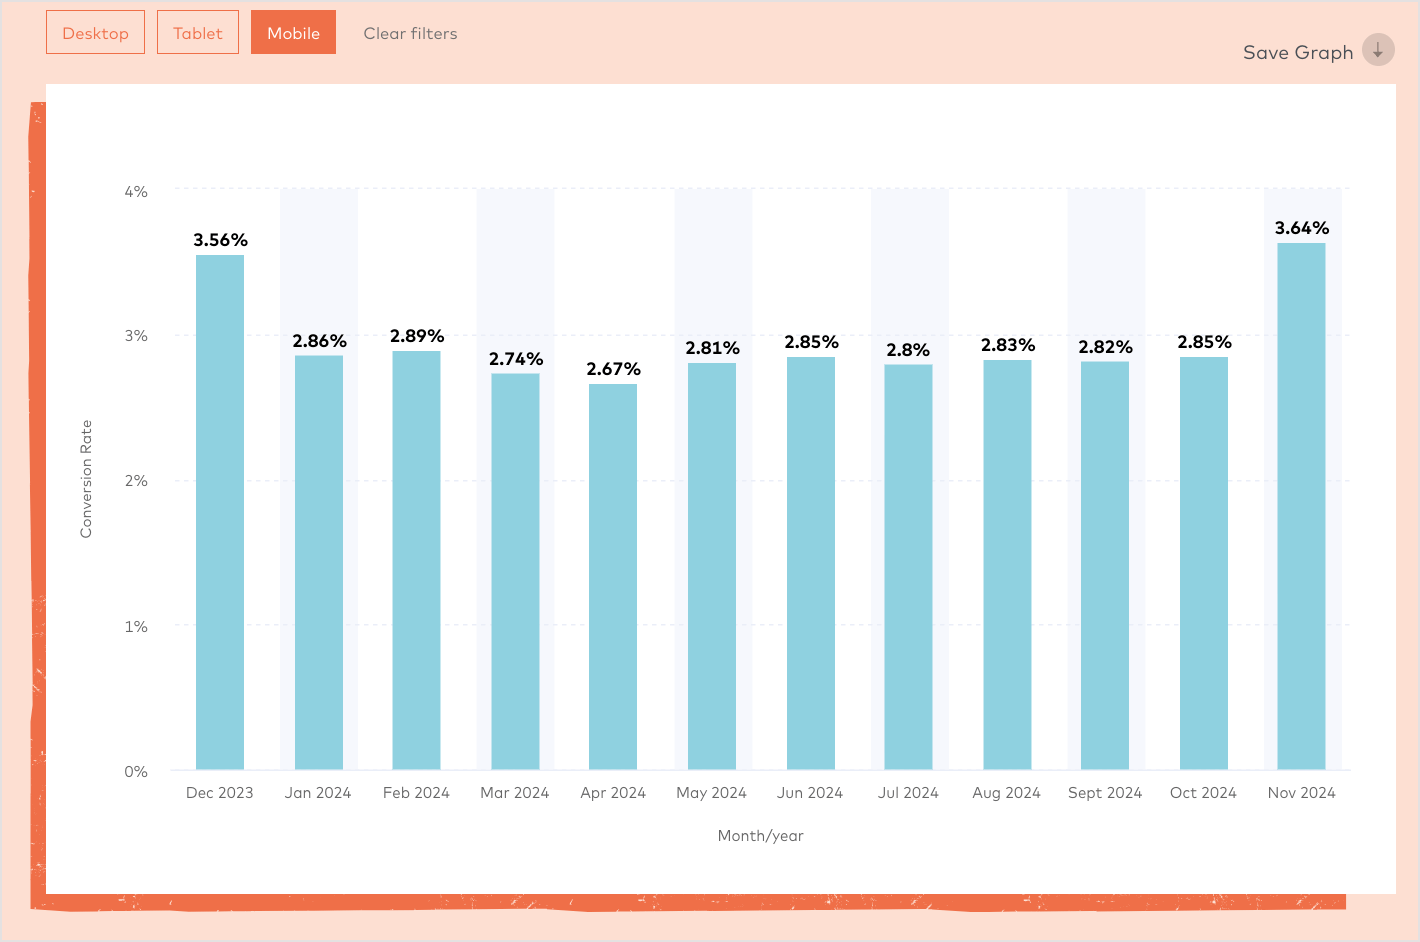

Overall average converation rate is 2.9%. Our company has 0.83%. We can set up a goal to reach at least 1% to keep up with market

## Second metric:
##### Repeat/returning customer rate  
_Customers who made two or more purchases / Total customers x 100_

In [ ]:
SELECT 
ROUND((SELECT count(visitor_id) FROM
(SELECT visitor_id FROM events
WHERE event LIKE '%transaction%'
GROUP BY 1
HAVING count(visitor_id) >= 2))::NUMERIC / count(visitor_id) * 100, 6) AS Returning_Customer_Rate FROM events

Outcome:  
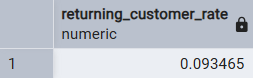  
_Query complete 00:00:00.375_

The result showcases wonderful result. Sales converstaion rate is 6x bigger than returning customer rate. I can assume that the problem may be in the product or in the discount/loyalty programs. Implementing new loyalty programs and making returning to the company serve to the customer benefits. Testing the product quality and probably fixing it will make the customers come back. Continuing this journey we can segment this metric into months to expand our vision

In [ ]:
SELECT  EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) AS month,
ROUND((SELECT count(visitor_id) FROM
(SELECT visitor_id FROM events
WHERE event LIKE '%transaction%'
GROUP BY 1
HAVING count(visitor_id) >= 2))::NUMERIC / count(visitor_id) * 100, 6) AS Returning_Customer_Rate FROM events
GROUP BY 1
ORDER BY 1

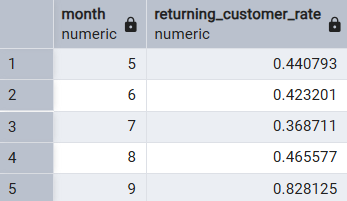

_Query complete 00:00:00.834_

 We can see that it starts great in may but start to fall at the start of the summer. September is so high because the data include only the part of september The lowest peak is july, the middle of the summer. Probably something happened in the may-june. Most likely new promotion didnt work or discounts or product quality fall a lot. To be sure what it is exactly i will compare returning customer rate and sales converation rate by months to showcase the reason why it fall

In [ ]:
SELECT EXTRACT(MONTH FROM to_timestamp(timestamp/1000):: date) AS month, ROUND(
    (SELECT count(DISTINCT transaction_id) FROM events
WHERE transaction_id IS NOT NULL)::numeric / count(*), 6) * 100 AS Sales_Conversion_Rate
FROM events
GROUP BY 1
ORDER BY 1

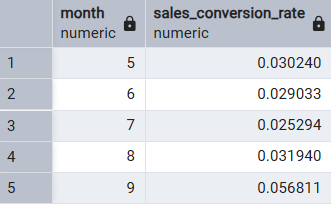

_Query complete 00:00:00.667_

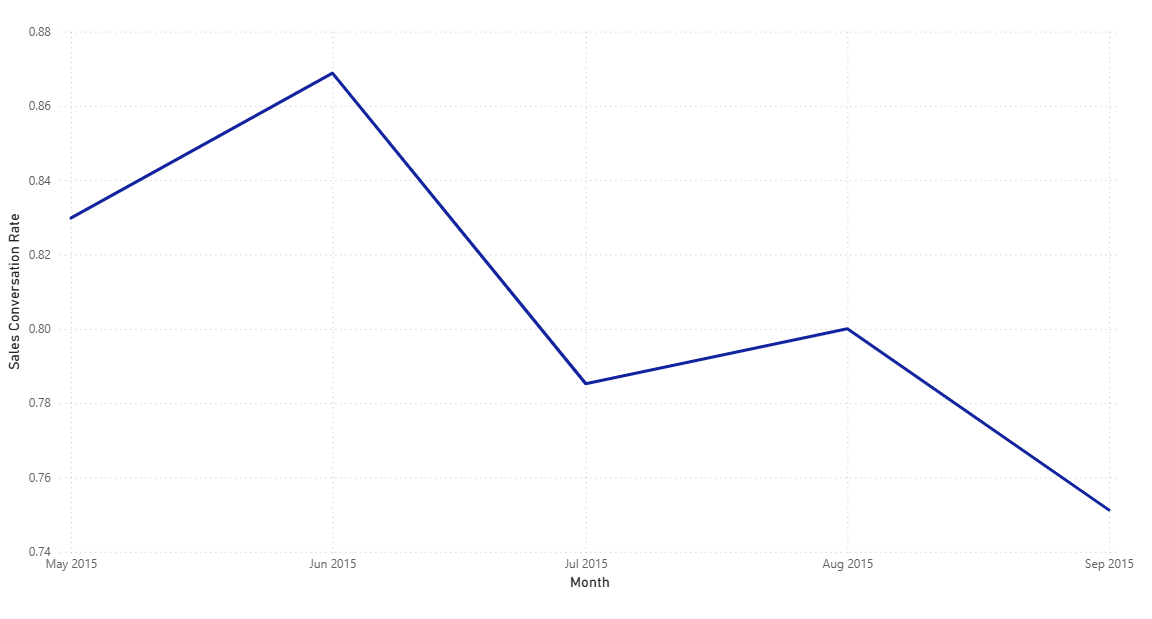

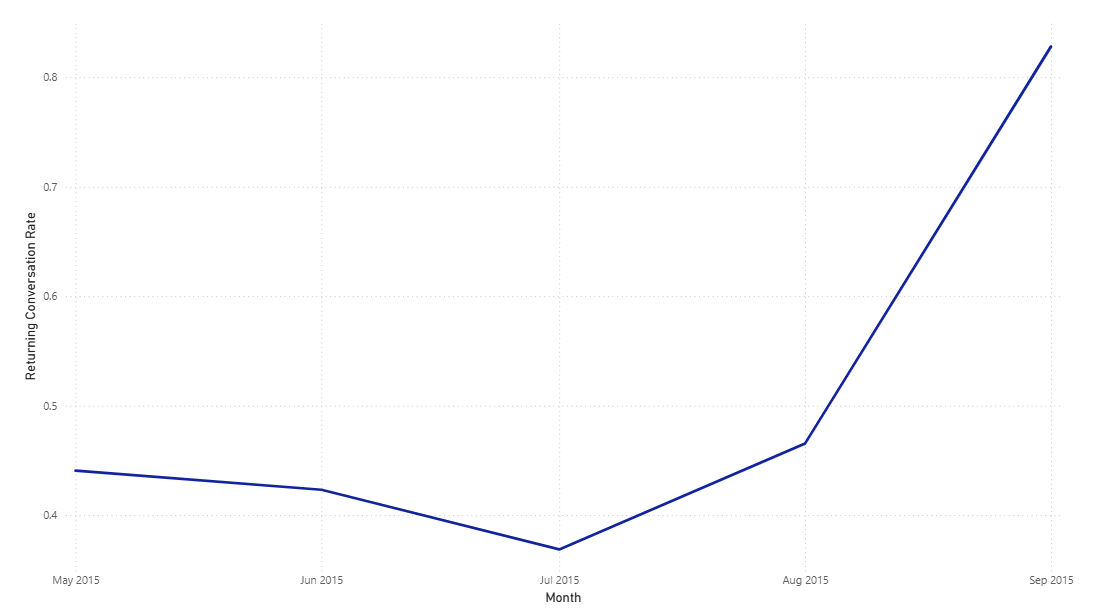

_Query complete 00:00:00.603_

The similarity is obvious, both of them falls in june. Looks like june was downgrade of the product quality and there was logistic issues, such as transportation, purchasing and etc. But in the august this issues must been solved and it september it flies high for returning customer rate and falls for sales conversation rate. The data is up to 18 september, so it come over through the half of the month. One more reason can be seasonal changes, when with the end of the summer everyone has the need to buy something. Next metric will show which customers come back and their quality. Witnessing this information will show the growth/fall of the customers that we can tie with the sales/return rates

## Third metric:  
##### Website Traffic / Quality  
_Number of visits to a website, as well as visitor quality_

In [ ]:
# Firstly find 100 percent of actions
SELECT visitor_id, count(event) AS "100"
FROM events
GROUP BY 1

# Then find high quality actions
SELECT visitor_id, count(event) AS high_q
FROM events
WHERE event NOT LIKE 'view' 
GROUP BY 1
_______________________________________________________________________________________________________________________________________________________

SELECT e.visitor_id, h.hu AS actions, COALESCE(ROUND(v.high_q::numeric / NULLIF(h.hu::numeric, 0), 2), 0) AS quality_percent from events AS e

LEFT JOIN (SELECT visitor_id, count(event) AS hu
FROM events
GROUP BY 1) AS h ON e.visitor_id = h.visitor_id 

LEFT JOIN (SELECT visitor_id, count(event) AS high_q
FROM events
WHERE event LIKE 'transaction'
GROUP BY 1) AS v ON e.visitor_id = v.visitor_id

GROUP BY e.visitor_id, h.hu, v.high_q
ORDER BY 1

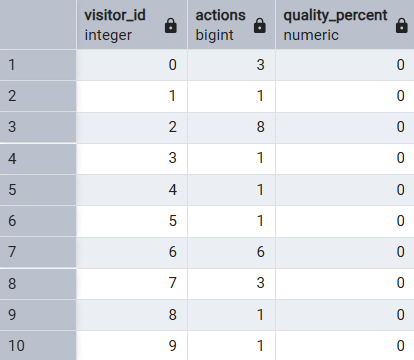

_Total Rows: 1407580 | Query Complete 00:00:07.805_

And the 0 quality percent filtered out

In [ ]:
SELECT e.visitor_id, h.hu AS actions, COALESCE(ROUND(v.high_q::numeric / NULLIF(h.hu::numeric, 0), 2), 0) AS quality_percent from events AS e

LEFT JOIN (SELECT visitor_id, count(event) AS hu
FROM events
GROUP BY 1) AS h ON e.visitor_id = h.visitor_id 

LEFT JOIN (SELECT visitor_id, count(event) AS high_q
FROM events
WHERE event LIKE 'transaction'
GROUP BY 1) AS v ON e.visitor_id = v.visitor_id

GROUP BY e.visitor_id, h.hu, v.high_q
having COALESCE(ROUND(v.high_q::numeric / NULLIF(h.hu::numeric, 0), 2), 0) != 0
ORDER BY 1

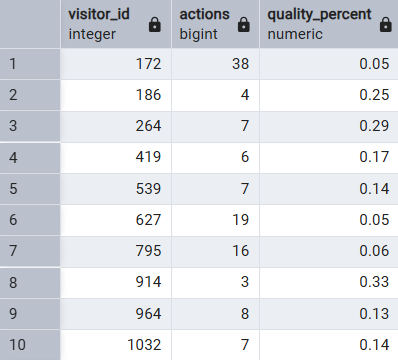

_Total Rows: 11709 | Query Complete: 00:00:04.649_

In [ ]:
SELECT EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date), sum(actions) as actions, sum(quality_percent) as quality, count(visitor_id) AS visitors FROM(
SELECT e.timestamp, e.visitor_id, h.hu AS actions, COALESCE(ROUND(v.high_q::numeric / NULLIF(h.hu::numeric, 0), 2), 0) AS quality_percent from events AS e

LEFT JOIN (SELECT visitor_id, count(event) AS hu
FROM events
GROUP BY 1) AS h ON e.visitor_id = h.visitor_id 

LEFT JOIN (SELECT visitor_id, count(event) AS high_q
FROM events
WHERE event LIKE 'transaction'
GROUP BY 1) AS v ON e.visitor_id = v.visitor_id

GROUP BY e.timestamp, e.visitor_id, h.hu, v.high_q
having COALESCE(ROUND(v.high_q::numeric / NULLIF(h.hu::numeric, 0), 2), 0) != 0
ORDER BY 1)
GROUP BY 1
ORDER BY 1

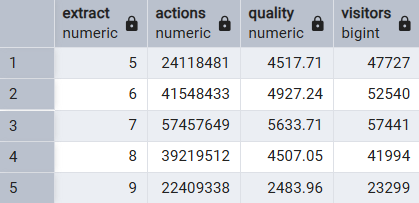

_Query complete 00:00:04.884_

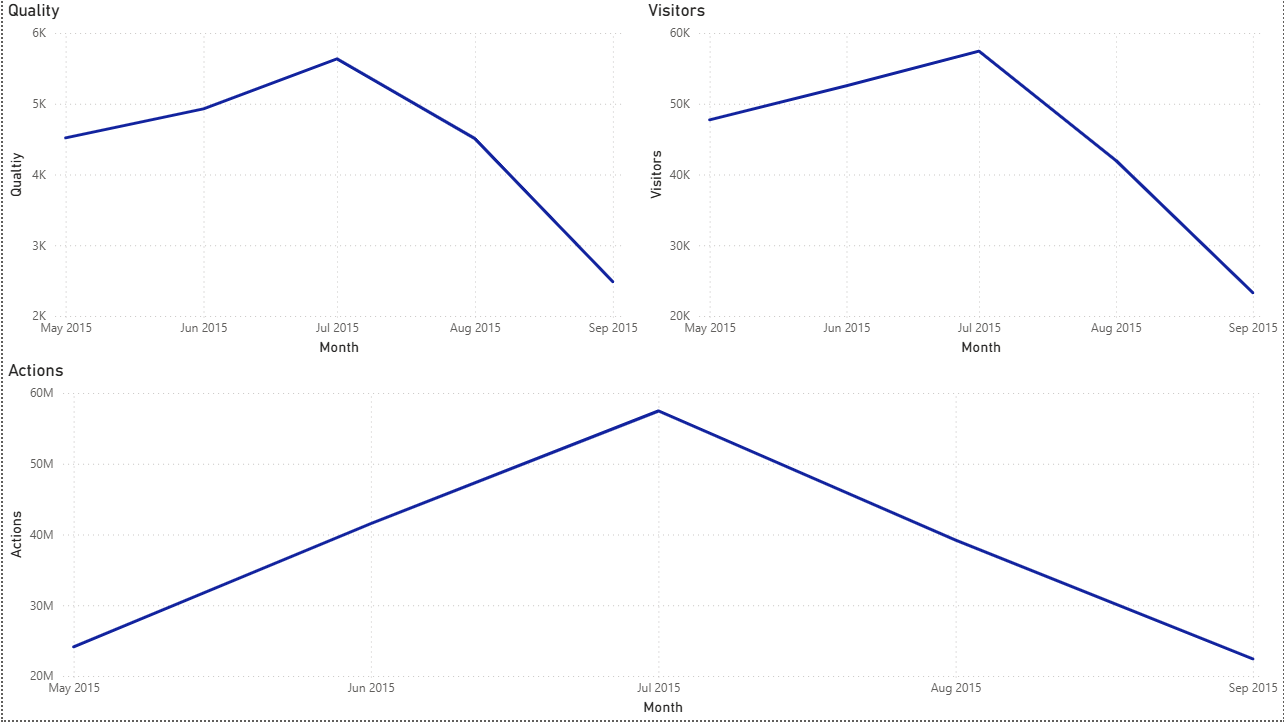

This is incredible result. It fully inverts our perception. June-July wasn't bad, but great. The growth was significant, but in august it falls down. number of actions, quality and visitors growth together. Which showcases great marketing/sales strategy and the fall of return/sales rate is related with that, because the general amount of visitors had grown and it affect the previous rates. And it partially explains significant growth in september, due to less amount of visitors of unfull month. But there must been a great discount/actions taken by the company that had increased the product qualtiy or provided good benefits for customers. Next metric will show the stage where customers tend to stop

## Fourth Metric:
##### Add-to-Cart Rate  
_Website sessions where visitor adds products to cart in a specific period / Total sessions during that period x 100_

In [ ]:
SELECT ROUND(sum(add_to_cart_rate)::numeric / count(*), 6) * 100 AS add_to_cart FROM
(SELECT visitor_id, MAX(CASE WHEN event LIKE 'addtocart' THEN 1 ELSE 0 END) AS Add_to_Cart_Rate 
FROM events
GROUP BY visitor_id
ORDER BY 1)

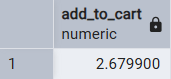

_Query Complete 00:00:01.262_

By months:

In [ ]:
SELECT EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) AS month, ROUND(COUNT(DISTINCT CASE WHEN event = 'addtocart' THEN visitor_id END)::numeric / count(DISTINCT visitor_id) * 100, 6) AS Add_to_Cart_Rate 
FROM events
GROUP BY EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date)
ORDER BY 1

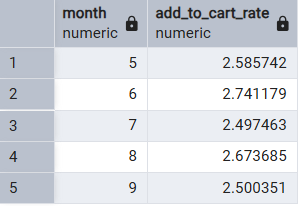

_Query complete 00:00:02.657_

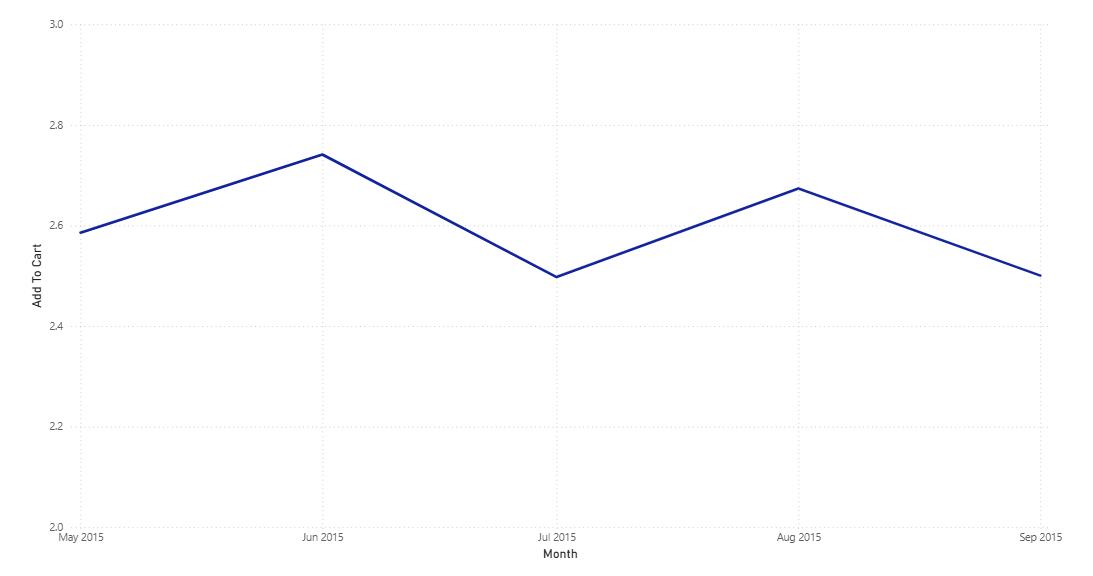

The graph is stable in form of waves. This can mean either good signs or bad. Good ones can be:
Successfull discount/promotion in each 2 months
Stability of customers
  
Bad ones:
Rate does not grow  
Shopping Carting - Using cart as wishlist or to check the price with the delivery
  
To define which one is in your case we can compare it with the sales conversation rate

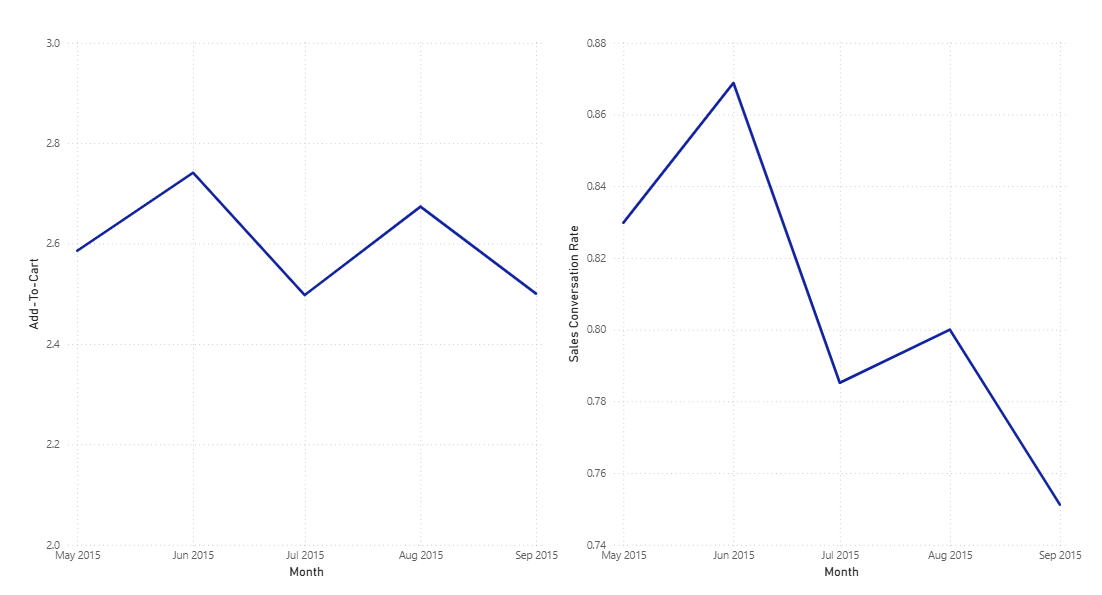

They both share the raise points being in June and August and down points in May, July, and September. However, while the add-to-cart rate eventually returns to its previous level, the sales conversion rate continues to decline. This means that the checkout stage has become less effective  customers add items to their carts but fail to complete the purchase. The amount of accidental customers decreases, while the amount of targeted customers increases, meaning the audience is becoming more intentional but still faces barriers at checkout. If the company continues with this position, the sales conversion rate may continue to fall, while add to cart can still stay stable. To check the quality of these add-to-cart sessions, I will analyze the cart abandonment rate to identify where users drop off

Now to set up a goal, lets take a look at the average values in the field. Average add to cart rate in e commerce for mobile devices(75%)

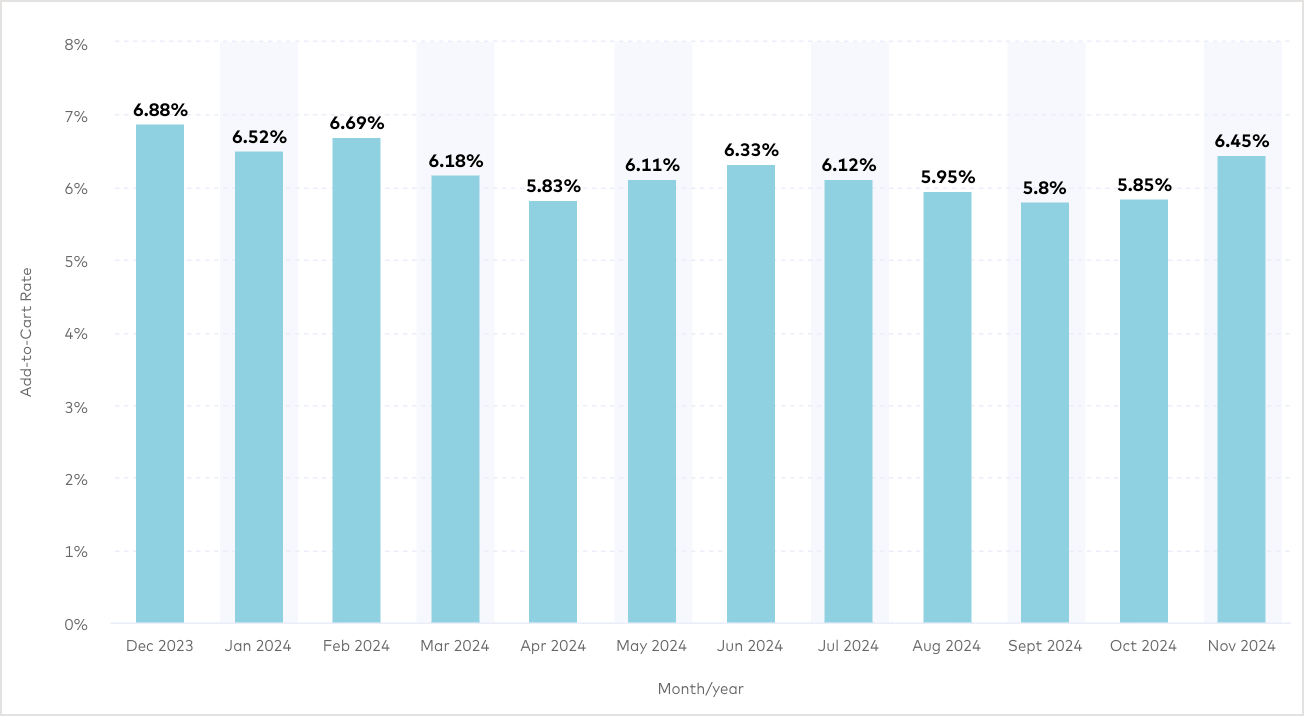

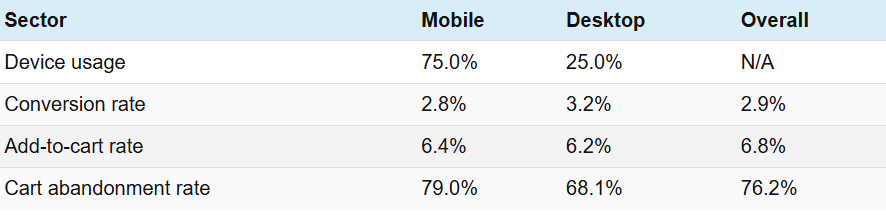

Overall add to cart rate is 6.8%, a stable level. In our case we have 2.67%, that is below average by far. To enchance add to cart rate the company can look at the UX and website involvement. So the goal for this metric will be to reach 5% by focusing on improving UX/UI design, product page clarity, and overall website involvement ensuring a smoother, faster, and more persuasive user experience.

## Fifth Metric:
##### Cart Abandonment Rate (Proxy metric due to the absence of the checkout)  
_1 – (Completed purchases / Carts created) × 100_

In [ ]:
SELECT ROUND(1 - sum(CASE WHEN event LIKE 'transaction' THEN 1 ELSE 0 END)::numeric
/ sum(CASE WHEN event LIKE 'addtocart' THEN 1 ELSE 0 END)::numeric, 3) * 100 AS cart_abandonment_rate
FROM events

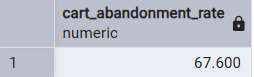

_Query Complete 00:00:00.189_

By months:

In [ ]:
SELECT EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) AS month, ROUND(1 - sum(CASE WHEN event LIKE 'transaction' THEN 1 ELSE 0 END)::numeric
/ sum(CASE WHEN event LIKE 'addtocart' THEN 1 ELSE 0 END)::numeric, 6) AS cart_abandonment_rate
FROM events
GROUP BY 1
ORDER BY 1

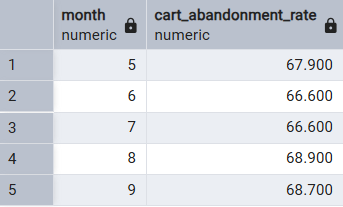

_Query complete 00:00:00.899_

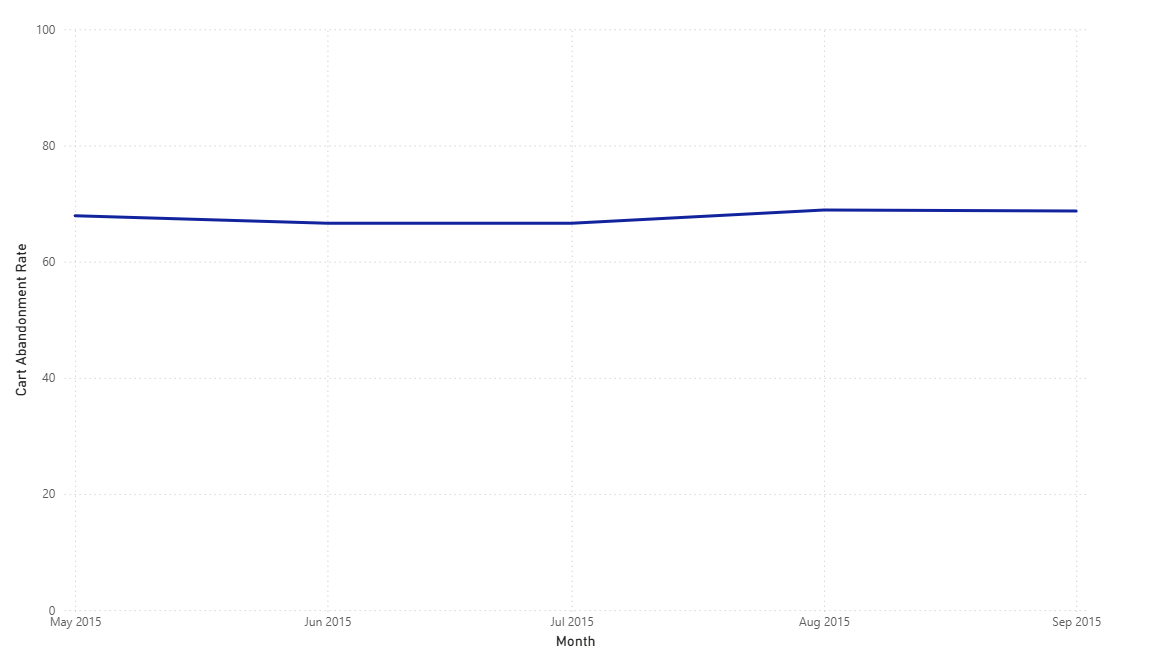

Cart abandonment rate is almost still, and do not follow add to cart rate. This means that people's behavior does not change after adding an item to their cart
  
Those who reach the shopping cart behave roughly the same each month
  
Changes occur before this step, at the level of motivation and interest in the product
  
In conclusion we can see that quality of the add to cart do not change, but the amount. Looks like there was successfull discount/promotion or seasonal change. Relauching or making new promotion like that will be a great idea to keep increasing add to cart rate/sales conversation rate

## Sixth Metric:
##### Average Order Value  
_Total revenue / Number of orders_

To calculate this metric i created a new column in item properties, because everything in this table is hashed. To reach prices of items i need to define which property is responsible for price. The only property where every row had n(all the numbers has n at the start) is 790. Time to create column price

In [ ]:
ALTER TABLE item_properties ADD COLUMN price DECIMAL(12, 2)

# And then insert price

UPDATE item_properties 
SET price = regexp_replace(value, 'n', '', 'g')::DECIMAL(12, 2)
WHERE property = '790'

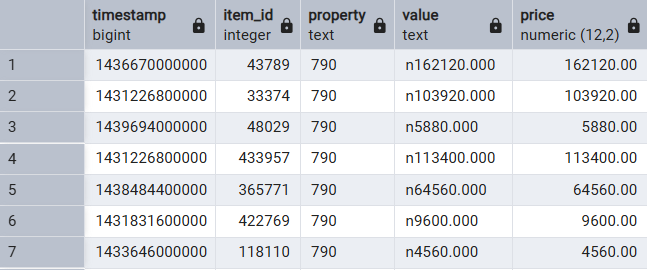

_Total rows: 25647450 | Query complete 00:00:09.757_

Now i need to find and filter out the last price change to get actual price. For this purpose i can use window function. Because right now i have multiple prices

In [ ]:
SELECT * FROM item_properties
WHERE property = '790'
ORDER BY item_id

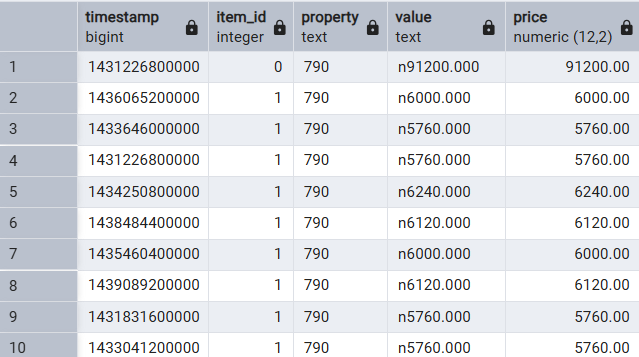

_Total rows: 1790516 | Query complete 00:00:02.903_

In [ ]:
SELECT * FROM (
SELECT *, ROW_NUMBER() OVER (PARTITION BY item_id ORDER BY timestamp DESC) FROM item_properties
WHERE property = '790')

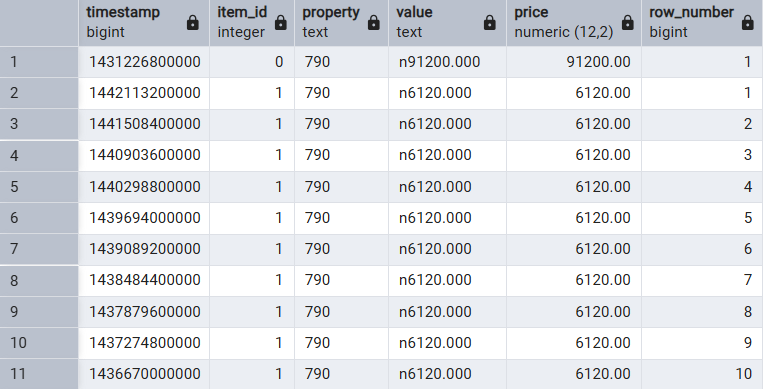

_Total rows: 1790516 | Query complete 00:00:03.105_

In [ ]:
# Join everything, fiter out only the rows where row number is 1 and creating view

CREATE VIEW transactions AS 
SELECT e.*, p.price FROM events AS e
JOIN (SELECT * FROM (
SELECT *, ROW_NUMBER() OVER (PARTITION BY item_id ORDER BY timestamp DESC) FROM item_properties
WHERE property = '790'
)
WHERE row_number = 1) AS p ON p.item_id = e.item_id
WHERE event = 'transaction'

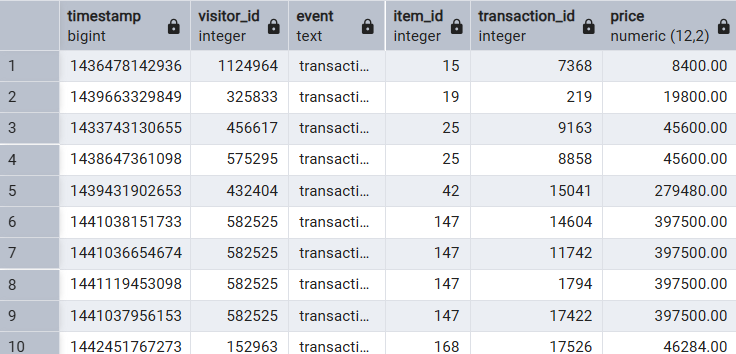

_Total rows: 21982 | Query complete 00:00:01.636_

It opens possibility to calculate average order value

In [ ]:
SELECT 
  ROUND(SUM(price) / COUNT(DISTINCT transaction_id), 2) AS average_order_value
FROM transactions;

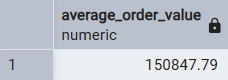

_Query complete 00:00:01.481_

In first sight it can be seen as too high value, but we got to remember that retailrocket is a russian company, so the currency is not in dollars or euro. Neither it is not rubles, but kopecks(ruble/100). We need to tie it with the ruble-euro course for the time range of may - september. The course information was taken from exchangerates.org(see references)

_Average EUR to RUB exchange rate_    
in May 2015: **56.6**  
June 2015: **61.4041**  
July 2015: **63.0649**  
August 2015: **72.929**  
September 2015: **75.1897**  

Let's join it to our kopecks average order value

In [ ]:
WITH tx AS (
  SELECT
    transaction_id,
    price / 100 AS price_rub,
    EXTRACT(MONTH FROM TO_TIMESTAMP(timestamp/1000)) AS month_num
  FROM transactions
),
joined AS (
  SELECT
    t.transaction_id,
    t.price_rub,
    t.price_rub / c.eur_rub AS price_eur
  FROM tx t
  JOIN currency_rates_2015 c
    ON t.month_num = c.month_num
)
SELECT
  ROUND(SUM(price_eur)::numeric / COUNT(DISTINCT transaction_id), 2) AS avg_order_value_eur
FROM joined;


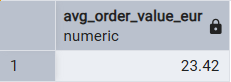

_Query complete 00:00:03.505_

By Months:

In [ ]:
WITH tx AS (
  SELECT
    transaction_id,
    price / 100 AS price_rub,
    EXTRACT(MONTH FROM TO_TIMESTAMP(timestamp/1000)) AS month_num
  FROM transactions
),
joined AS (
  SELECT
    t.transaction_id,
    t.month_num,                  
    t.price_rub,
    t.price_rub / c.eur_rub AS price_eur
  FROM tx t
  JOIN currency_rates_2015 c
    ON t.month_num = c.month_num
)
SELECT
  month_num,
  ROUND(SUM(price_eur)::numeric / COUNT(DISTINCT transaction_id), 2) AS avg_order_value_eur
FROM joined
GROUP BY month_num
ORDER BY month_num;

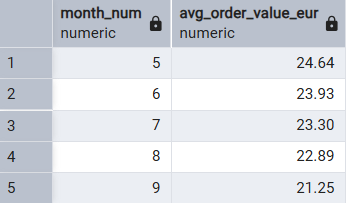

_Query complete 00:00:03.107_

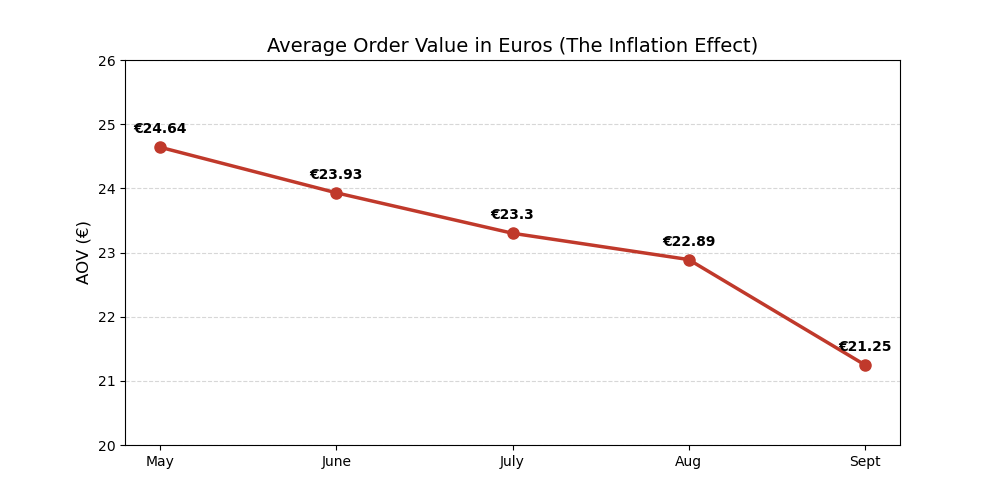

There is a consistent downward trend in the real value of orders. Over the course of 4.5 months, the average value of a basket dropped by 13.7% (from €24.64 to €21.25)
  
Currency Devaluation: As the Ruble weakened against the Euro (going from ~56 to ~75 RUB/EUR), the purchasing power of the average customer likely stayed the same in nominal Rubles, but fell significantly in real Euro value
  
Business Impact: Even if the store maintained the same number of transactions, they were effectively making less money per order every single month
  
Link to Net MRR: This explains why your Churn MRR (contraction) was so high in August and September. Returning customers weren't necessarily buying fewer items, but the items they bought were worth less in hard currency

Average Order Value is decreasing every month(excluding september because it didnt end). 

## Seventh Metric:
##### Total revenue from paying customers in a given month(New MRR, Expansion MRR, Churn MRR, ARPA)  
_Total revenue from paying customers in a given month_
    
To calculate this metric i need date, because right now my timestamp is in UNIX code

In [ ]:
SELECT to_timestamp(timestamp / 1000)::date AS date, * FROM transactions

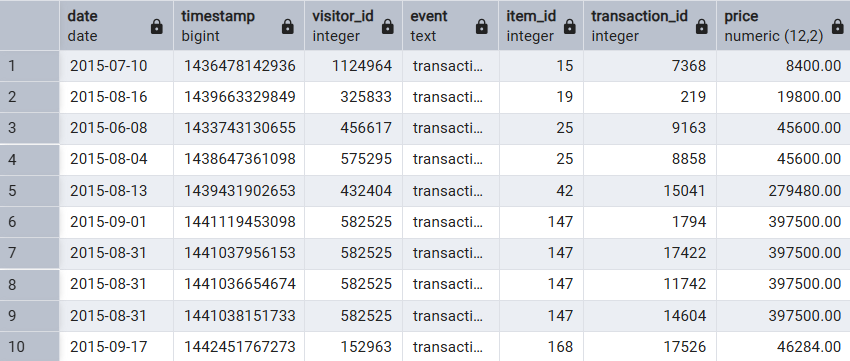

_Total rows: 21982 | Query complete 00:00:01.678_

The calculation from total revenue for each month:

In [ ]:
SELECT EXTRACT(MONTH FROM date) AS month, sum(price) FROM 
(SELECT to_timestamp(timestamp / 1000)::date AS date, * FROM transactions)
GROUP BY 1

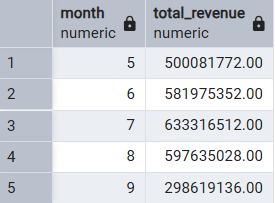

_Query complete 00:00:01.555_

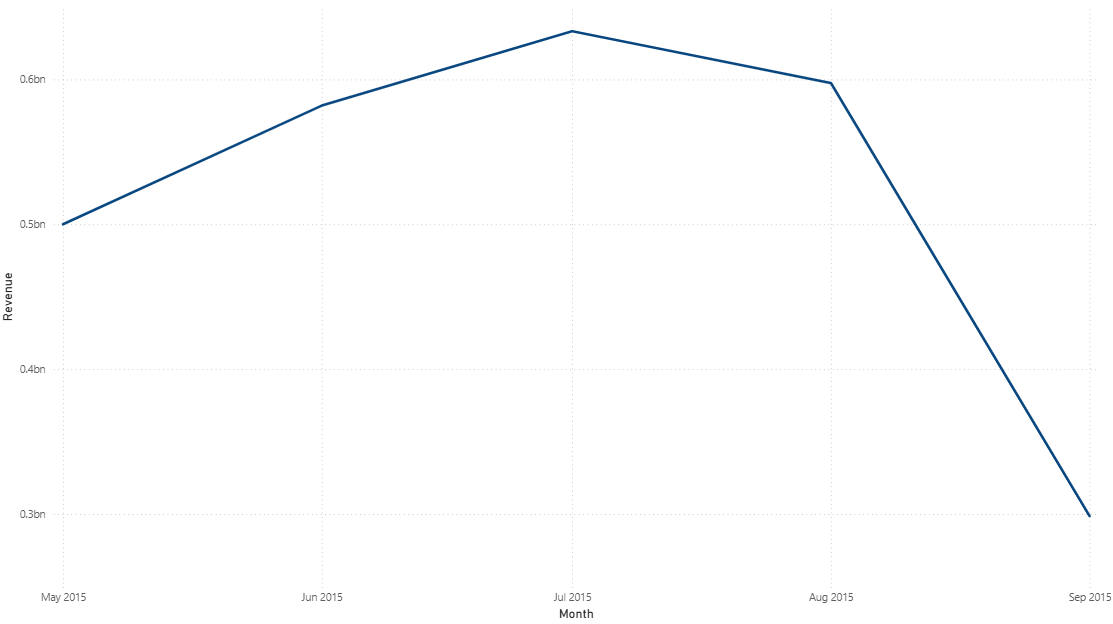

##### New MRR. Revegue gained from new customers  
_Total number of new customers in a month x Revenue brought in by new customers in month_

In [ ]:
SELECT month, count(visitor_id) AS new_visitors, sum(price) AS revenue FROM 
(SELECT EXTRACT(MONTH FROM g.date) AS month, g.visitor_id, sum(g.price) AS price 
FROM 
(SELECT to_timestamp(timestamp / 1000)::date AS date, *, ROW_NUMBER() OVER (PARTITION BY visitor_id ORDER BY timestamp) 
FROM transactions) AS g  

JOIN (
SELECT date, visitor_id FROM(
SELECT to_timestamp(timestamp / 1000)::date AS date, *, ROW_NUMBER() OVER (PARTITION BY visitor_id ORDER BY timestamp) 
FROM transactions) 
WHERE row_number = 1
) AS v ON v.visitor_id = g.visitor_id
WHERE EXTRACT(MONTH FROM g.date) = EXTRACT(MONTH FROM v.date)
GROUP BY 1, 2 
ORDER BY 1)
GROUP BY 1

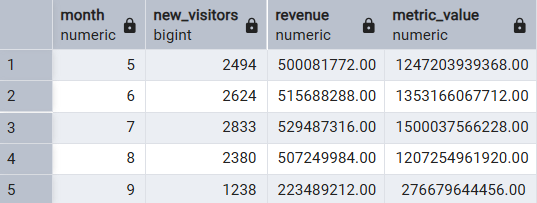

_Query complete 00:00:03.363_

##### Expansion MMR
_Total number of customers who upgraded in a month x (New revenue - Old revenue)_

From may to june:

In [ ]:
SELECT sum(june - may) AS Expansion_MMR, ROUND(sum(j.june) / sum(june - may), 2) AS percent
FROM 
(SELECT visitor_id, sum(price) AS may FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 5
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS june FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 6
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE j.june > m.may

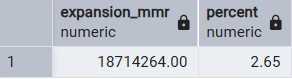

_Query complete 00:00:04.891_

From june to july:

In [ ]:
SELECT sum(july - june) AS Expansion_MMR, ROUND(sum(j.july) / sum(july - june), 2) AS percent
FROM 
(SELECT visitor_id, sum(price) AS june FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 6
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS july FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 7
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE j.july > m.june

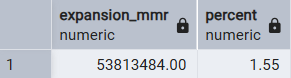

_Query complete 00:00:05.028_

From july to august:

In [ ]:
SELECT sum(august - july) AS Expansion_MMR, ROUND(sum(j.august) / sum(august - july), 2) AS percent
FROM 
(SELECT visitor_id, sum(price) AS july FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 7
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS august FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 8
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE j.august > m.july

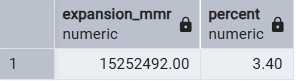

_Query complete 00:00:04.881_

From august to september:

In [ ]:
SELECT sum(september - august) AS Expansion_MMR, ROUND(sum(j.september) / sum(september - august), 2) AS percent
FROM 
(SELECT visitor_id, sum(price) AS august FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 8
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS september FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 9
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE j.september > m.august

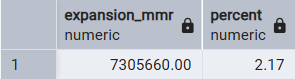

_Query complete 00:00:03.909_

##### Churn MMR  
_Total number of customers who canceled or downgraded x Lost revenue_  
  
For may to june:

In [ ]:
SELECT sum(june - may) AS churn_MMR, ABS(ROUND(sum(j.june) / sum(june - may), 2)) AS percent
FROM 
(SELECT visitor_id, sum(price) AS may FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 5
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS june FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 6
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE m.may > j.june

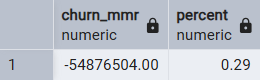

_Query complete 00:00:04.421_

From june to july:

In [ ]:
SELECT sum(july - june) AS Churn_MMR, ABS(ROUND(sum(j.july) / sum(july - june), 2)) AS percent
FROM 
(SELECT visitor_id, sum(price) AS june FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 6
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS july FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 7
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE m.june > j.july

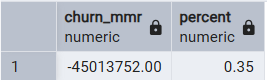

_Query complete 00:00:04.528_

From july to august:

In [ ]:
SELECT sum(august - july) AS Churn_MMR, ABS(ROUND(sum(j.august) / sum(august - july), 2)) AS percent
FROM 
(SELECT visitor_id, sum(price) AS july FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 7
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS august FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 8
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE m.july > j.august

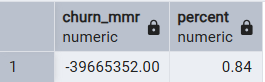

Query complete 00:00:04.852

From august to september:

In [ ]:
SELECT sum(september - august) AS Churn_MMR, ABS(ROUND(sum(j.september) / sum(september - august), 2)) AS percent
FROM 
(SELECT visitor_id, sum(price) AS august FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 8
GROUP BY 1) AS m
JOIN 
(SELECT visitor_id, sum(price) AS september FROM transactions
WHERE EXTRACT(MONTH FROM to_timestamp(timestamp/1000)::date) = 9
GROUP BY 1) AS j ON m.visitor_id = j.visitor_id
WHERE m.august > j.september

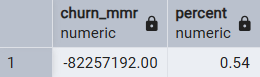

_Query complete 00:00:04.812_

##### Net MRR Growth

In [ ]:
WITH monthly_revenue AS (
    SELECT 
        visitor_id,
        EXTRACT(MONTH FROM to_timestamp(timestamp/1000)) AS month_num,
        SUM(price) AS monthly_spend
    FROM transactions
    GROUP BY 1, 2
),
revenue_comparison AS (
    SELECT 
        curr.month_num,
        curr.monthly_spend AS current_spend,
        prev.monthly_spend AS prev_spend
    FROM monthly_revenue curr
    JOIN monthly_revenue prev 
        ON curr.visitor_id = prev.visitor_id 
        AND curr.month_num = prev.month_num + 1 -- Join with previous month
),
mrr_changes AS (
    SELECT 
        month_num,
        -- Expansion: User spent MORE this month than last month
        SUM(CASE WHEN current_spend > prev_spend THEN (current_spend - prev_spend) ELSE 0 END) AS expansion,
        -- Churn: User spent LESS this month than last month (Negative value)
        SUM(CASE WHEN current_spend < prev_spend THEN (current_spend - prev_spend) ELSE 0 END) AS churn
    FROM revenue_comparison
    GROUP BY 1
)
SELECT 
    month_num,
    expansion,
    churn,
    (expansion + churn) AS net_mrr_growth
FROM mrr_changes
ORDER BY month_num;

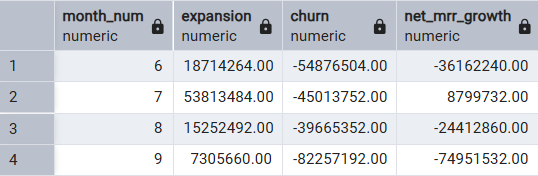

_Query complete 00:00:04.336_

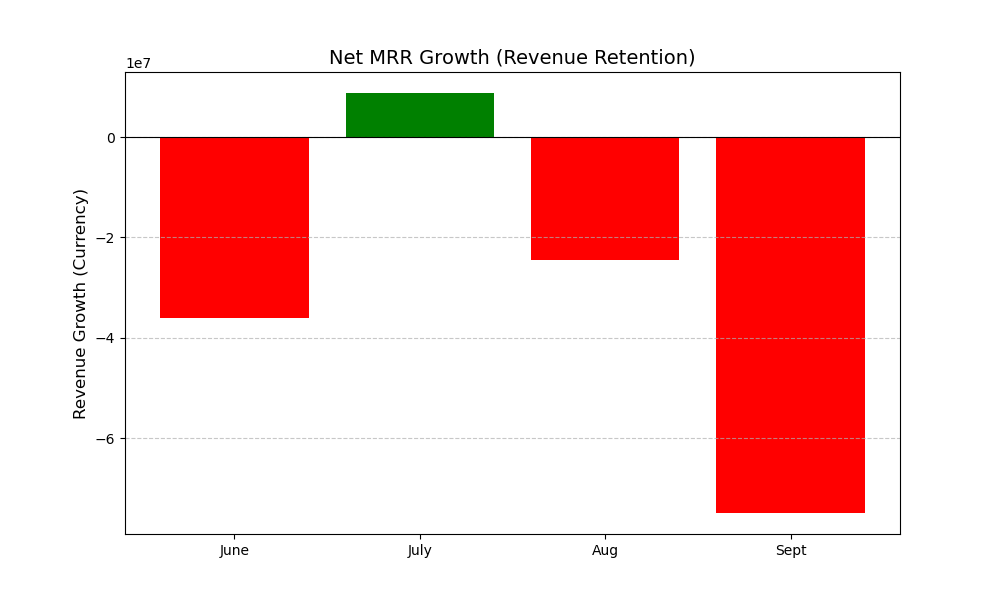

July (Month 7) was the peak performance: This is the only month with Positive Net Growth (+8.7M). The Expansion revenue (53M) outweighed the Churn. This aligns with your previous finding that July had "high quality" website traffic. Existing customers spent significantly more in July than they did in June  
  
August (Month 8) decline: Expansion dropped sharply (from 53M down to 15M). While Churn stabilized slightly, the lack of upsells/cross-sells caused the Net Growth to turn negative (-24M)
    
September (Month 9) Warning: The massive drop in September (-74M) is likely a data artifact. Since the dataset ends on September 18th, customers haven't had the full month to purchase. When comparing a full August to a half September, it mathematically looks like everyone "churned" (bought less).

Conclusion:
The company struggles with retention monetization. Apart from a successful spike in July (likely due to a specific mid-summer campaign or seasonal demand), returning users consistently spend less in subsequent months (Churn > Expansion)

#### Customer Retention Rate
_(Customers at end of period – New customers) / Customers at beginning of period × 100_

In [ ]:
WITH monthly_customers AS (
    SELECT DISTINCT 
        EXTRACT(MONTH FROM to_timestamp(timestamp/1000)) AS month_num,
        visitor_id
    FROM events
    WHERE event = 'transaction' 
),
retention_counts AS (
    
    SELECT 
        previous_month.month_num AS start_month,
        
        COUNT(DISTINCT previous_month.visitor_id) AS customers_at_start,
        
        
        COUNT(DISTINCT current_month.visitor_id) AS retained_customers
    FROM monthly_customers previous_month
    LEFT JOIN monthly_customers current_month 
        ON previous_month.visitor_id = current_month.visitor_id 
        AND current_month.month_num = previous_month.month_num + 1
    GROUP BY 1
)

SELECT 
    start_month,
    customers_at_start,
    retained_customers,
    ROUND((retained_customers::numeric / customers_at_start) * 100, 2) AS retention_rate_percent
FROM retention_counts
WHERE customers_at_start > 0
ORDER BY start_month;

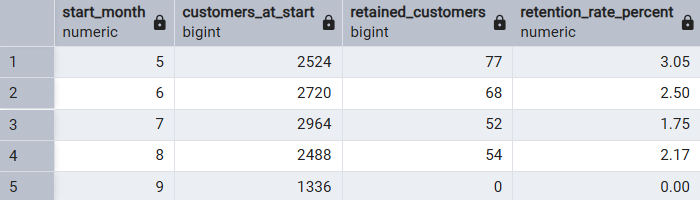

_Query complete 00:00:00.443_

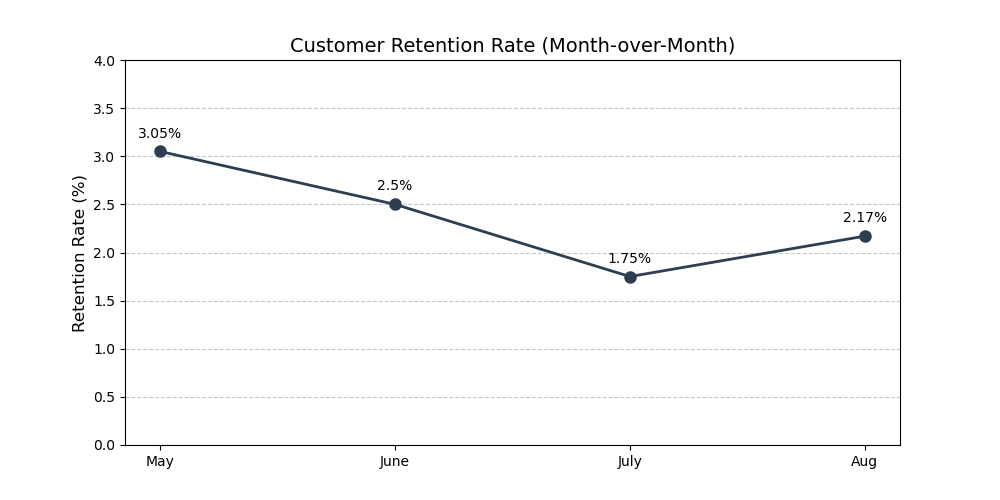

Retention Hit a Low in July (1.75%): Fewer people came back in July compared to any other month
  
BUT Revenue Growth Peaked in July (Previous Metric): Recall your Net MRR Growth was positive (+$8.7M) only in July
  
Conclusion:
While the number of returning customers dropped in July (only 52 people), the value of those specific customers was incredibly high. The company lost the "window shoppers" (low retention) but kept the "big spenders" (High Expansion MRR).

# Conclusion and Strategic Recommendations
Executive Summary  

The RetailRocket data analysis (May-Sept 2015) provides the picture of the company that can get consistent attention but fails to create value. Though the Add-to-Cart rate (approximately 2.6) does not decrease, Sales Conversion Rate (0.83) is much less than the average in the e-commerce sector (approximately 2-3). This implies that there is a critical leak at the funnel through the checkout stage
  
At the same time, the firm was experiencing powerful negative economic wind. The average value of orders in Euros fell by 13.7 percent in the period due to devaluation of the currency. Although the increase in revenues in certain months (July) was positive among high-value users, the general tendency is the inability to retain customers and continue purchasing value
  
Key Data Insights
1. The Bottleneck of Checkout Friction
User intent/user action is massively disconnected
Data: The rate of adding items to carts is consistent (2.6%), but only 0.83% of that is converted to a transaction.
Insight: Customers are discovery products that they like, although its checkout is a stumbling block. This implies difficulties like: difficult registration process, absence of payment systems, or unforeseen shipping expenses in the nick of the time
  
2. The Revenue Impact of Inflation Effect
Each month, the company is making lower profits on an order
Data: AOV decreased steadily, as in May it was equal to 24.64 and in September it was equal to 21.25.
Observation: With the weakening of the Ruble in 2015, the actual value of customer purchases had decreased. This is the reason why the Churn MRR (contraction) was high; loyal buyers did not necessarily purchase fewer products but their buying capacity had decreased resulting in a value in the lower-end basket
  
3. July Paradox (Quality vs. Quantity)
The most revealing and deviant month was July
Data: Customer Retention has reached its lowest level (1.75%), but Net MRR Growth was also positive ( + €8.7M).
Realisation: As the summer season entered, the store lost window shoppers (low-retention) and monetised high-intent shoppers. This is an indication that a smaller base of loyal users is more lucrative to this business than huge traffic but of inferior quality
  
Strategic Actions
  
According to the statistics, the recommendations that will help increase performance are as follows:
1. Optimize the Bottom of the Funnel (Technical)
Action: Add a Guest Checkout feature and decrease abandonment
Action: Put shipping prices in front of cart stage to control expectations
Goal: Add-to-Cart (2.6) to Conversion (0.8) means that the shortest time to increase revenue (without investing in acquiring new traffic) is to halve the difference
  
2. Fight against Falling AOV (Merchandising)
Action: Introduce a Product Bundling (e.g., Buy these 3 items and get a 10% discount)
Rationale: As the currency value is decreasing, bundling would encourage the user to include more items in the cart, which will artificially increase the AOV to the level of the €25 range
  
3. Invest in Retention as opposed to Acquisition(Marketing)
Action: Introduce a Win-Back email campaign to those who have not made a purchase within 30 days
Reason: The business by its very nature is too dependent on the need to locate new customers on a daily basis with a retention rate of just about 2.5. To stabilize the Net MRR Growth, retention would have to increase to only 5%

References:  
Chaffey, D. (2025, January 2). E-commerce conversion rate benchmarks - 2025 update. Smart Insights. https://www.smartinsights.com/ecommerce/ecommerce-analytics/ecommerce-conversion-rates/  
Euro to Russian rouble History: 2015. (n.d.). https://www.exchangerates.org.uk/EUR-RUB-spot-exchange-rates-history-2015.html